<a href="https://colab.research.google.com/github/Kangin-Lee/ML_Example/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn

Text(0, 0.5, 'feat1')

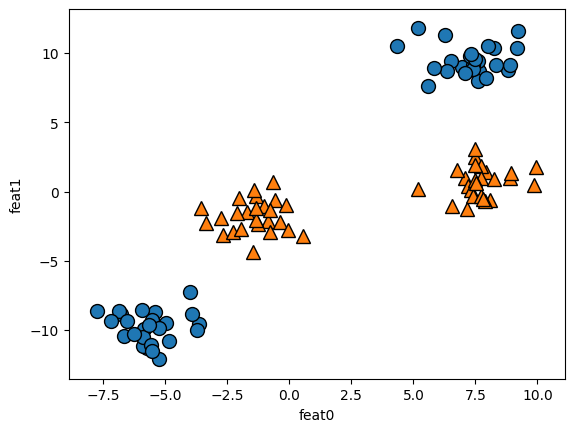

In [14]:
from sklearn.datasets import make_blobs

X,y=make_blobs(centers=4, random_state=8)
y= y %2
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("feat0")
plt.ylabel("feat1")

Text(0, 0.5, 'feat1')

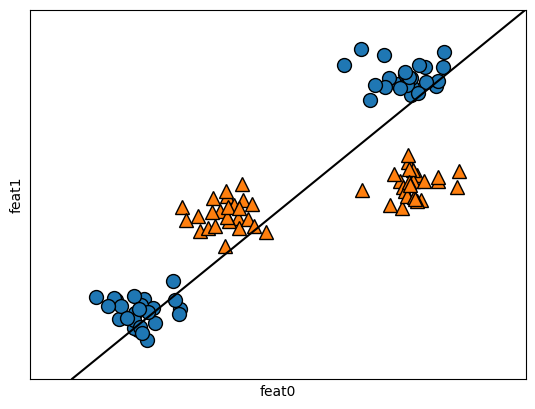

In [27]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=5000, tol= 1e-3).fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("feat0")
plt.ylabel("feat1")

<ipython-input-40-c5e6b9ce1028>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask,0], X_new[mask,1],X_new[mask,2], c="b", cmap=mglearn.cm2, s=60, edgecolor="k")
<ipython-input-40-c5e6b9ce1028>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask,0], X_new[~mask,1],X_new[~mask,2], c="r", cmap=mglearn.cm2, s=60, edgecolor="k", marker="^")


Text(0.5, 0, 'feat 1 ** 2 ')

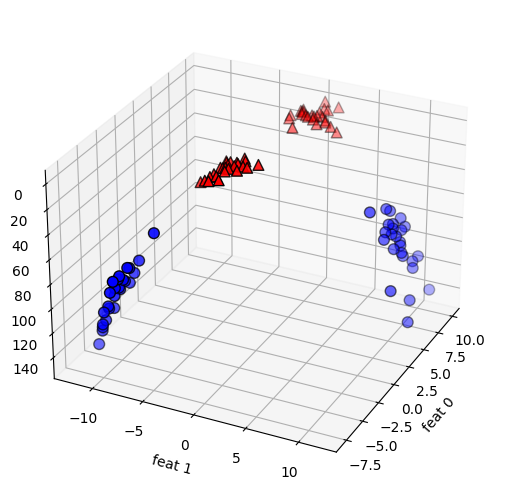

In [40]:
X_new = np.hstack([X,X[:,1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
import matplotlib
figure = plt.figure()

if matplotlib.__version__ >= "3.4":
  ax=Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
  figure.add_axes(ax)

else:
  ax = Axes3D(figure, elev=-152, azim=-26)

mask = y ==0
ax.scatter(X_new[mask,0], X_new[mask,1],X_new[mask,2], c="b", cmap=mglearn.cm2, s=60, edgecolor="k")
ax.scatter(X_new[~mask,0], X_new[~mask,1],X_new[~mask,2], c="r", cmap=mglearn.cm2, s=60, edgecolor="k", marker="^")
ax.set_xlabel("feat 0")
ax.set_ylabel("feat 1")
ax.set_zlabel("feat 1 ** 2 ")

<ipython-input-42-2a44f847ec17>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask,0], X_new[mask,1],X_new[mask,2], c="b", cmap=mglearn.cm2, s=60, edgecolor="k")
<ipython-input-42-2a44f847ec17>:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask,0], X_new[~mask,1],X_new[~mask,2], c="r", cmap=mglearn.cm2, s=60, edgecolor="k", marker="^")


Text(0.5, 0, 'feat 1 ** 2 ')

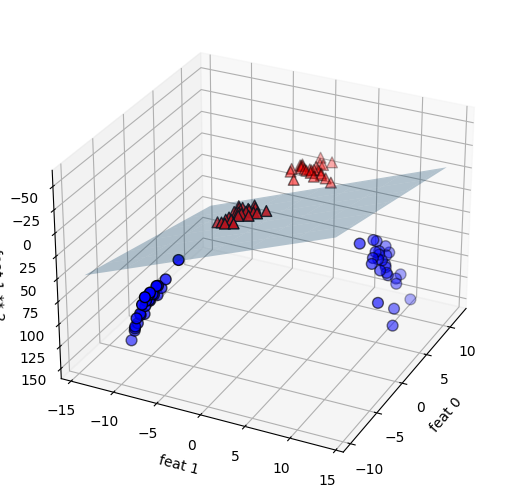

In [42]:
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
figure = plt.figure()
if matplotlib.__version__ >= "3.4":
  ax=Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
  figure.add_axes(ax)
else:
  ax = Axes3D(figure, elev=-152, azim=-26)
xx=np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2, 50)
yy=np.linspace(X_new[:,1].min()-2, X_new[:,1].max()+2, 50)

XX,YY = np.meshgrid(xx,yy)
ZZ=(coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX,YY,ZZ, rstride=8, cstride=8, alpha=0.3)

ax.scatter(X_new[mask,0], X_new[mask,1],X_new[mask,2], c="b", cmap=mglearn.cm2, s=60, edgecolor="k")
ax.scatter(X_new[~mask,0], X_new[~mask,1],X_new[~mask,2], c="r", cmap=mglearn.cm2, s=60, edgecolor="k", marker="^")
ax.set_xlabel("feat 0")
ax.set_ylabel("feat 1")
ax.set_zlabel("feat 1 ** 2 ")

Text(0, 0.5, 'feat1')

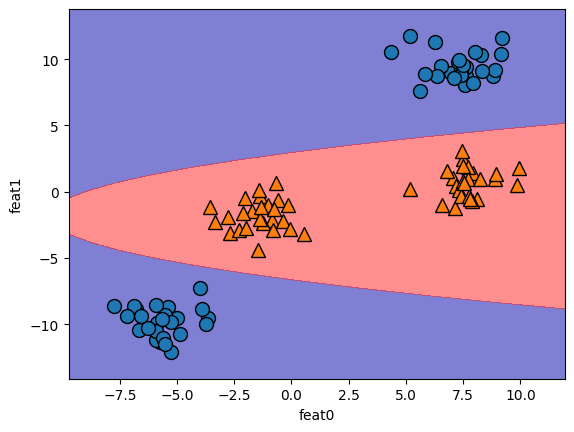

In [43]:
ZZ= YY**2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap = mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("feat0")
plt.ylabel("feat1")

Text(0, 0.5, 'feat1')

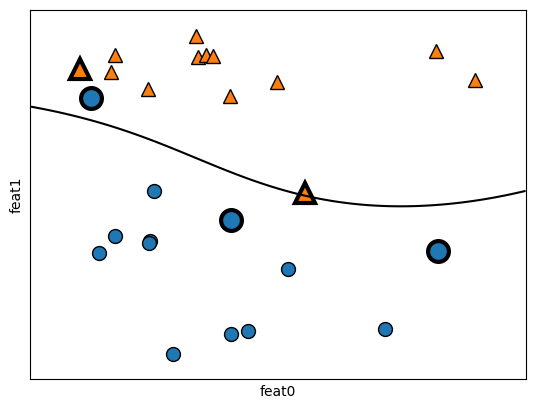

In [44]:
from sklearn.svm import SVC
X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = 'rbf', C= 10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)

mglearn.discrete_scatter(X[:,0],X[:,1],y)

sv = svm.support_vectors_

sv_labels=svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s= 15, markeredgewidth=3)
plt.xlabel("feat0")
plt.ylabel("feat1")

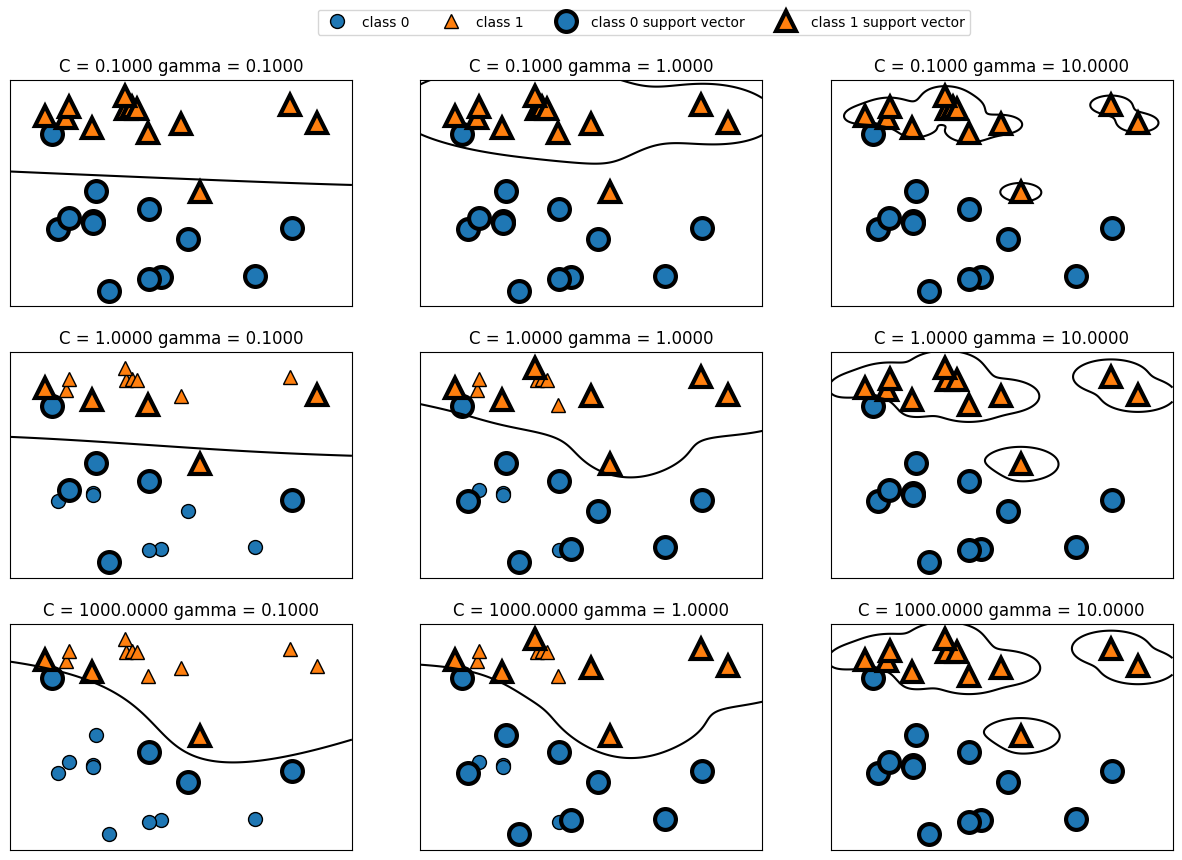

In [46]:
fig, axes = plt.subplots(3,3, figsize=(15,10))

for ax, C in zip(axes, [-1, 0,3]):
  for a, gamma in zip(ax, range(-1,2)):
    mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax= a)

axes[0,0].legend(["class 0", "class 1", "class 0 support vector", "class 1 support vector"], ncol=4, loc=(.9, 1.2))

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

svc = SVC()
svc.fit(X_train, y_train)

print("train set acc:{:.2f}".format(svc.score(X_train, y_train)))
print("test set acc:{:.2f}".format(svc.score(X_test, y_test))) #과소 적합!

train set acc:0.90
test set acc:0.94


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

svc = SVC(C=1200)
svc.fit(X_train, y_train)

print("train set acc:{:.2f}".format(svc.score(X_train, y_train)))
print("test set acc:{:.2f}".format(svc.score(X_test, y_test)))

train set acc:0.96
test set acc:0.95


Text(0, 0.5, 'size')

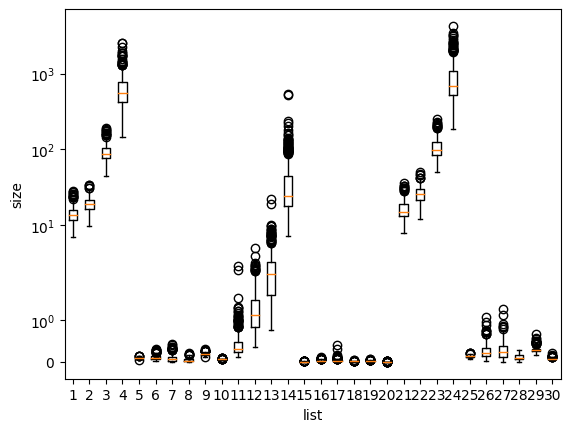

In [51]:
plt.boxplot(X_train)
plt.yscale("symlog")
plt.xlabel("list")
plt.ylabel("size")

In [54]:
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training) / range_on_training
print("min:\n", X_train_scaled.min(axis=0))
print("max:\n", X_train_scaled.max(axis=0))

min:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
max:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [55]:
X_test_scaled = (X_test - min_on_training) / range_on_training

In [60]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("train set acc:{:.3f}".format(svc.score(X_train_scaled, y_train)))
print("test set acc:{:.3f}".format(svc.score(X_test_scaled, y_test)))

train set acc:0.984
test set acc:0.972


In [59]:
svc = SVC(C=20)
svc.fit(X_train_scaled, y_train)

print("train set acc:{:.3f}".format(svc.score(X_train_scaled, y_train)))
print("test set acc:{:.3f}".format(svc.score(X_test_scaled, y_test)))

train set acc:0.988
test set acc:0.979
